In [ ]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
import pandas as pd

In [ ]:
train_data = pd.read_csv("../input/train.csv") #reading the csv files using pandas
test_data = pd.read_csv("../input/test.csv")

In [ ]:
train_data.shape

(42000, 785)

In [ ]:
test_data.shape

(28000, 784)

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Digit1')

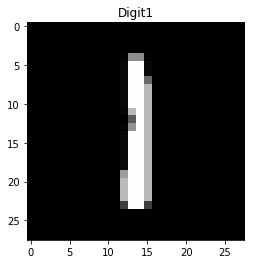

In [ ]:
x = train_data.iloc[2, 1:]
x.shape
x = x.values.reshape(28,28)
plt.imshow(x, cmap='gray')
plt.title("Digit"+str(train_data.iloc[2, 0]))

In [ ]:
# data types
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


In [ ]:
# average feature values
round(train_data.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.01
pixel14     0.01
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.01
pixel762    0.04
pixel763    0.08
pixel764    0.11
pixel765    0.18
pixel766    0.30
pixel767    0.41
pixel768    0.51
pixel769    0.56
pixel770    0.68
pixel771    0.60
pixel772    0.49
pixel773    0.34
pixel774    0.22
pixel775    0.12
pixel776    0.06
pixel777    0.02
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

In [ ]:
## Separating the X and Y variable
y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

In [ ]:
X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (42000, 784)
test_data: (28000, 784)


In [ ]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 68)

In [ ]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'), "\n")
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9137301587301587 

Precision: 0.913390166949126 

Recall: 0.9130303184349146 

[[1199    0    3    3    4    8   13    0    5    0]
 [   0 1386    5    3    3    2    1    2    5    0]
 [  11    7 1097   10   13    5    7   15   10    6]
 [   6   11   56 1186    1   53    3   13   26   11]
 [   1    4   27    0 1190    2    7   11    0   35]
 [  17   11   16   36   19 1003   13    2   20    2]
 [  19    4   32    0    9   11 1150    0    4    0]
 [   2    8    8    3   13    5    1 1191    5   44]
 [  14   28   25   62   10   38    6    7 1062   12]
 [   8    4    7   17   76    6    2   46    7 1049]]


In [ ]:
# polynomial model

model_poly = SVC(kernel='poly')
model_poly.fit(X_train, y_train)

# predict
y_pred_poly = model_poly.predict(X_test)

In [ ]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_poly), "\n")
print("Precision:",metrics.precision_score(y_test, y_pred_poly,average='macro'), "\n")
print("Recall:",metrics.recall_score(y_test, y_pred_poly,average='macro'), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_poly))

accuracy: 0.8752380952380953 

Precision: 0.9001432067512525 

Recall: 0.8735096147182901 

[[1108    0    3    0    9    9    9    1   96    0]
 [   0 1385    3    0    3    0    1    0   15    0]
 [   3    2  963    9   26    2    1    6  165    4]
 [   2   11   27 1077    5   17    0   14  198   15]
 [   1    7    6    0 1190    3    1    1   14   54]
 [   0    0    3   13   25  883   10    1  186   18]
 [   6   10    5    0   26    9 1082    0   91    0]
 [   0   19    4    3   41    0    0 1032   53  128]
 [   2    5    9   10    6   15    0    2 1204   11]
 [   4    1    4    7   48    3    0   17   34 1104]]


In [ ]:
# polynomial model

model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)

# predict
y_pred_rbf = model_rbf.predict(X_test)

In [ ]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rbf), "\n")
print("Precision:",metrics.precision_score(y_test, y_pred_rbf,average='macro'), "\n")
print("Recall:",metrics.recall_score(y_test, y_pred_rbf,average='macro'), "\n")
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_rbf))

accuracy: 0.9342063492063492 

Precision: 0.9344328444143898 

Recall: 0.9337827975367474 

[[1207    0    5    2    2    1   10    3    5    0]
 [   0 1388    5    2    3    2    1    2    4    0]
 [   7    1 1108   10    7    1    2   27   15    3]
 [   2   11   51 1219    0   24    2   29   21    7]
 [   2    1   22    0 1197    4    4   16    1   30]
 [   7    4   16   14   10 1046   17    9   11    5]
 [  13    3   17    0    4   11 1163   14    4    0]
 [   2    6    9    3    6    1    0 1221    3   29]
 [   8   17   19   24    7   24    7   16 1133    9]
 [   3    1   13   21   36    5    0   50    4 1089]]
